# Part 5: After Action Report / Mission Debrief

No Student Code Required


Thanks to your help in narrowing the search location, The beacon was located and secured after a short recovery operation

# Crash location Coordinates

The downed UAV was located at
*   **Latitude:** `37.42`
*   **Longitude:** `-119.05`


The map below is the same map from your final analysis in Part 5, but with an added marker showing the actual crash site. 

The team thanks you for your help!  Job Well Done!

✅ Data loaded and merged successfully.
Generating new map and caching to: solution_map.html
Adding true beacon location marker to the map.
✅ Map updated and saved to solution_map.html.



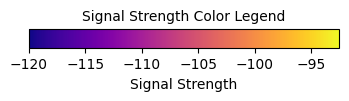

In [ ]:
import pandas as pd
import os
import folium
from IPython.display import display, IFrame
from uav_mapping_tools import create_triangulation_map, EDA_makeMap

# --- Configuration ---
# Define data directory and file paths
INTEL_DIR = 'data'
COMBINED_DATA_FILE = os.path.join(INTEL_DIR, 'final_combined_data.csv')
# INTEL_FILE = 'specialist_intel.csv'
# intel_path = os.path.join(INTEL_DIR, INTEL_FILE)
MAP_CACHE_PATH = 'solution_map.html'

# Indicate beacon location from the after action report
# These coordinates are used to place a marker on the map
# for comparison with the estimated location.
TRUE_BEACON_LAT = 37.42
TRUE_BEACON_LON = -119.05

# --- Load and Merge Data ---
try:
    combined_df = pd.read_csv(COMBINED_DATA_FILE)
    # intel_df = pd.read_csv(intel_path)
    # final_analysis_df = pd.merge(combined_df, intel_df, on='report_id', how='left')
    print("✅ Data loaded and merged successfully.")
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}. Please ensure previous notebooks have been run.")
    # In a real notebook, you might use 'exit()' here

# # --- Create the Triangulation Map ---
# # Use force_regenerate=True to ensure the map is always fresh for the solution.
# triangulation_map_object = create_triangulation_map(
#     final_analysis_df,
#     cache_path=MAP_CACHE_PATH,
#     force_regenerate=True
# )

regular_map_object = EDA_makeMap(
    # final_analysis_df,
    combined_df,
    cache_path=MAP_CACHE_PATH,
    force_regenerate=True
)

# --- Add the True Beacon Location Marker ---
# The create_triangulation_map function returns a folium.Map object when it regenerates.
if isinstance(regular_map_object, folium.Map):
    print("Adding true beacon location marker to the map.")
    folium.Marker(
        location=[TRUE_BEACON_LAT, TRUE_BEACON_LON],
        popup="<b>True Beacon Location</b>",
        tooltip="Actual Crash Site",
        icon=folium.Icon(color='green', icon='star')
    ).add_to(regular_map_object)

    # Re-save the map with the added marker
    regular_map_object.save(MAP_CACHE_PATH)
    print(f"✅ Map updated and saved to {MAP_CACHE_PATH}.") 
    # Display the final map from the newly saved file
    # display(IFrame(src=MAP_CACHE_PATH, width='100%', height=600))
    display(regular_map_object)
else:
    print("⚠️ Map object not returned correctly. Cannot add solution marker.")